<a href="https://colab.research.google.com/github/Melaka36/CodeZ/blob/main/Model_Training(Without_CV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns # data visualization

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc


In [ ]:
df=pd.read_csv("drive/MyDrive/4th_Year_Research/Implementation/Dataset/Pre-Processed-Dataset.csv")
df.shape

(3630, 25)

# Splitting data into X and Y

In [ ]:
#will drop the Nationality and International columns since they are highly correlated and only one nationality significantly dominates the data.
X = df.drop(columns=['Target'], axis=1)
Y = df['Target']

In [ ]:
X.shape

(3630, 24)

In [ ]:
X.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Gender,Scholarship holder,Age at enrollment,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,1,0,20,0,0,0,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,1,0,19,0,6,6,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,1,0,19,0,6,0,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,20,0,6,10,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,45,0,6,6,0,13.9,-0.3,0.79


In [ ]:
Y.head()

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64



---

# Splitting Data Into Training and Testing

---



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(3630, 24) (2904, 24) (726, 24)


# Model Training Without Scaling

# Linear Regression

In [ ]:
clf = LogisticRegression(max_iter=1000)  # Increase max_iter value
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print("Accuracy : ",accuracy_score(Y_test,y_pred))

Accuracy :  0.7741046831955923


Accuracy: 0.7741046831955923
Precision: 0.7698412698412699
Recall: 0.8899082568807339
F1-Score: 0.825531914893617
ROC-AUC: 0.7449541284403669


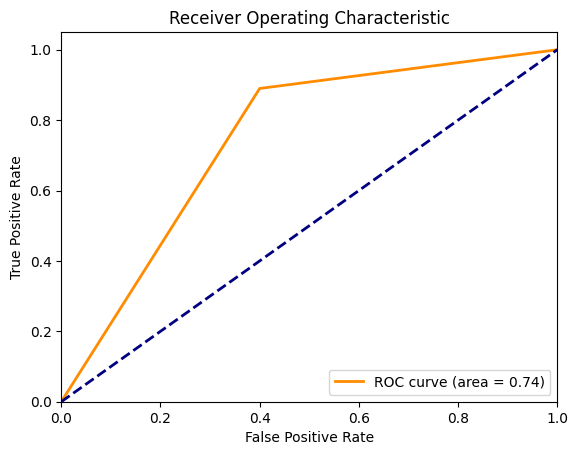

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[174 116]
 [ 48 388]]


<Axes: >

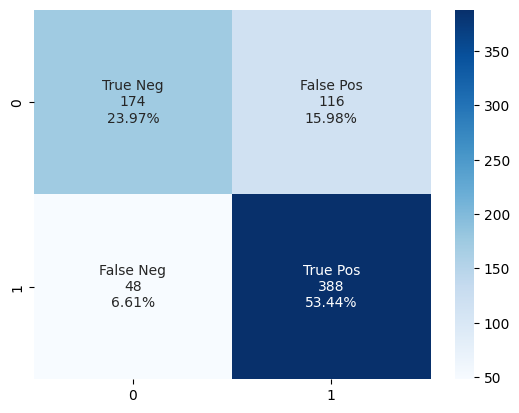

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

Training Accuracy: 0.7823691460055097
Testing Accuracy: 0.7741046831955923


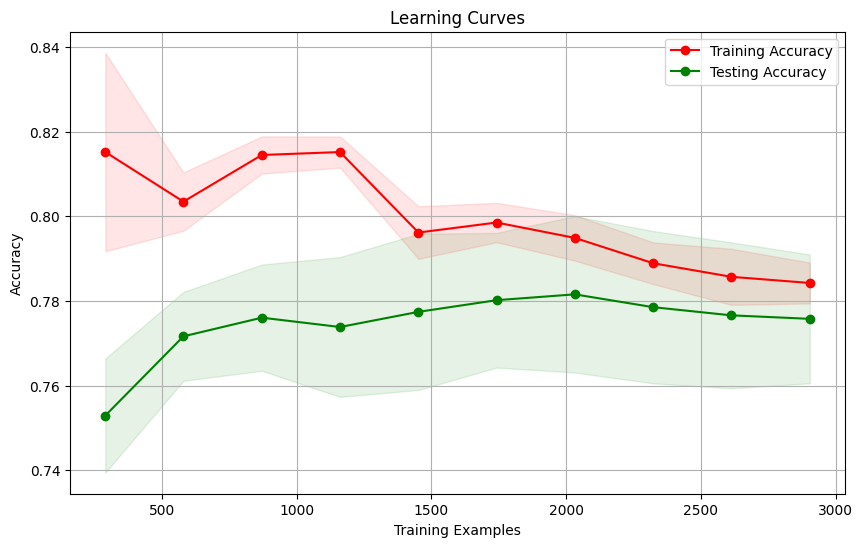

In [ ]:
train_predictions = clf.predict(X_train)

# Predict on the test set
test_predictions = clf.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(train_predictions,Y_train)
test_accuracy = accuracy_score(Y_test,test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot learning curve
plt.figure(figsize=(10, 6))
train_sizes, train_scores, test_scores = learning_curve(clf, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc="best")
plt.grid()
plt.show()

# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

#without scaling
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without Cross Validation: ",accuracy_score(Y_test,y_pred))
scores = cross_val_score(clf, X_train, Y_train, cv=5)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without Cross Validation:  0.7479338842975206
Without Scaling and With CV:  0.7624042969909193


Accuracy: 0.7479338842975206
Precision: 0.7842696629213484
Recall: 0.8004587155963303
F1-Score: 0.7922814982973894
ROC-AUC: 0.7347121164188548


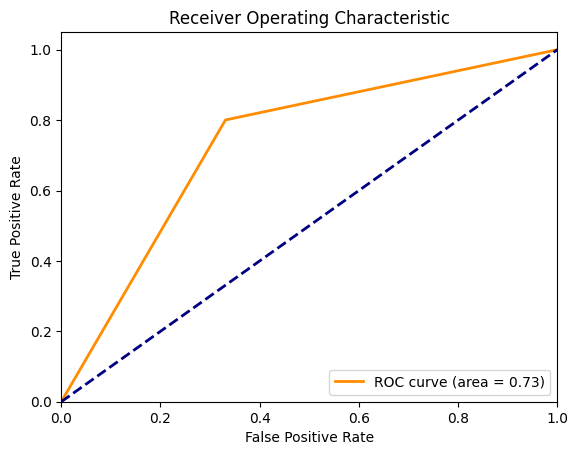

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[194  96]
 [ 87 349]]


<Axes: >

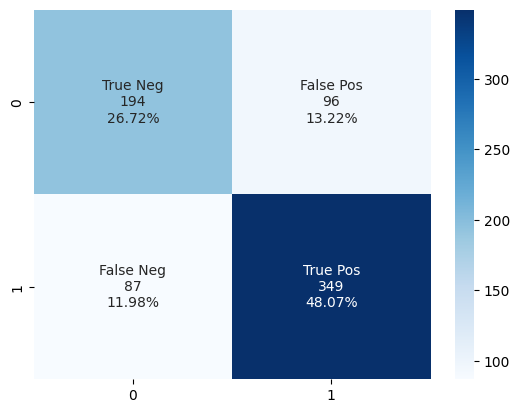

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

Training Accuracy: 1.0
Testing Accuracy: 0.7479338842975206


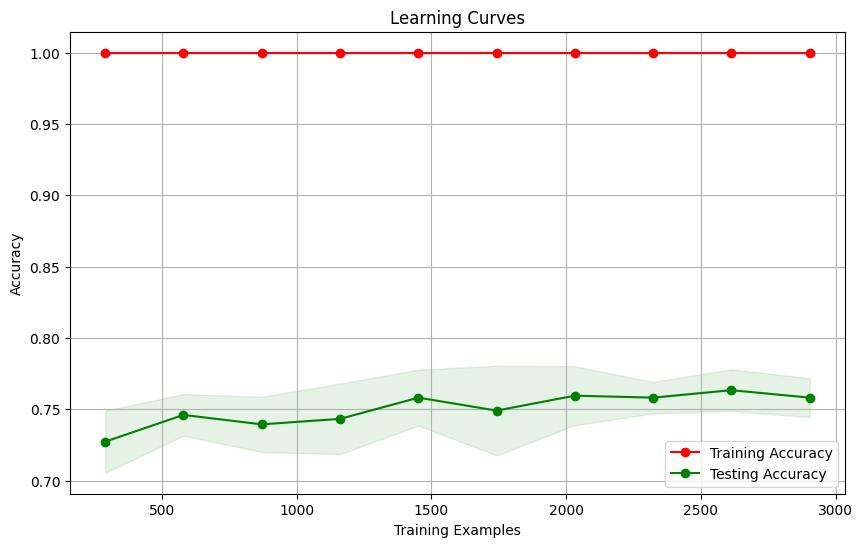

In [ ]:
train_predictions = clf.predict(X_train)

# Predict on the test set
test_predictions = clf.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(train_predictions,Y_train)
test_accuracy = accuracy_score(Y_test,test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot learning curve
plt.figure(figsize=(10, 6))
train_sizes, train_scores, test_scores = learning_curve(clf, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc="best")
plt.grid()
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train,Y_train)


RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

Accuracy: 0.8126721763085399
Precision: 0.8036437246963563
Recall: 0.9105504587155964
F1-Score: 0.8537634408602149
ROC-AUC: 0.7880338500474533


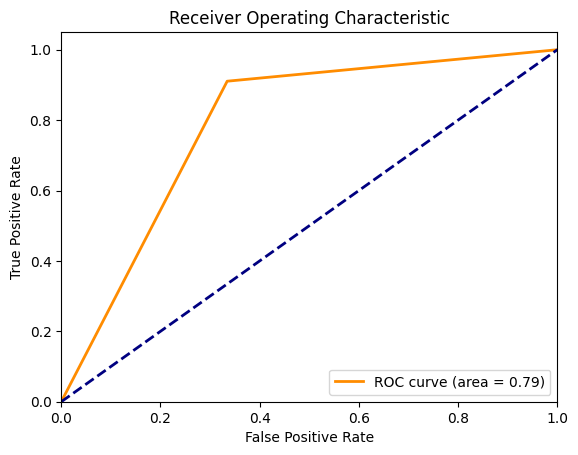

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[193  97]
 [ 39 397]]


<Axes: >

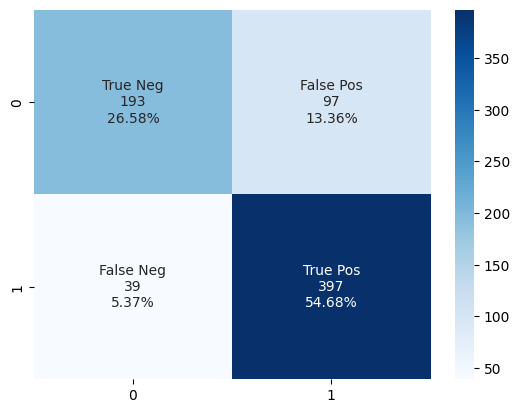

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

Training Accuracy: 0.9142561983471075
Testing Accuracy: 0.8126721763085399


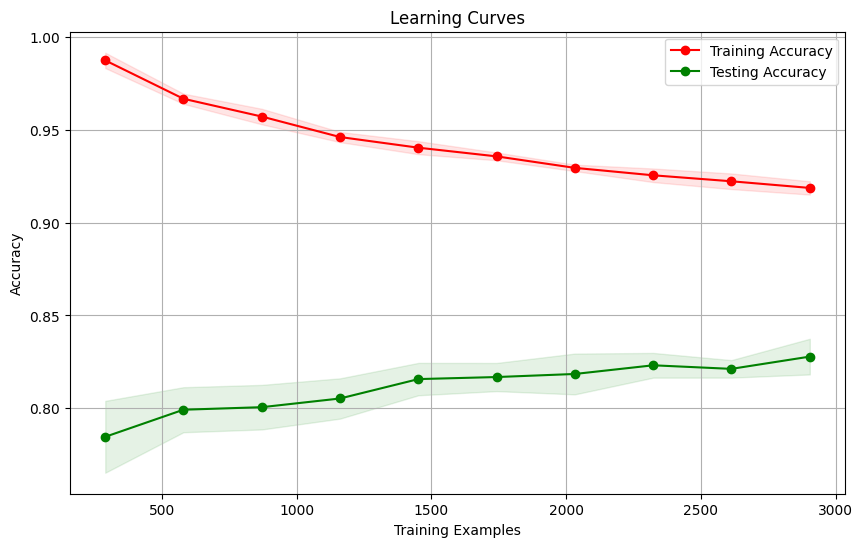

In [ ]:
train_predictions = clf.predict(X_train)

# Predict on the test set
test_predictions = clf.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(train_predictions,Y_train)
test_accuracy = accuracy_score(Y_test,test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot learning curve
plt.figure(figsize=(10, 6))
train_sizes, train_scores, test_scores = learning_curve(clf, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc="best")
plt.grid()
plt.show()

# Support Vector Machines

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')

svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(svc, parameters)

clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(Y_test,y_pred))
# scores = cross_val_score(clf, X_train, Y_train, cv=10)
# print("Without Scaling and With CV: ",scores.mean())

NameError: ignored

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# # Plot ROC Curve
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

Accuracy: 0.7933884297520661
Precision: 0.7848605577689243
Recall: 0.9036697247706422
F1-Score: 0.840085287846482
ROC-AUC: 0.7656279658335969


In [ ]:
# conf_matrix = confusion_matrix(Y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

In [ ]:
# group_names = ['True Neg','False Pos','False Neg','True Pos']
# group_counts = ["{0:0.0f}".format(value) for value in
#                 conf_matrix.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in
#                      conf_matrix.flatten()/np.sum(conf_matrix)]
# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
#           zip(group_names,group_counts,group_percentages)]
# labels = np.asarray(labels).reshape(2,2)
# sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

# Naive Bayers

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,Y_train)

y_pred = clf.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(Y_test,y_pred))
scores = cross_val_score(clf, X_train, Y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.7272727272727273
Without Scaling and With CV:  0.7451664889204883


Accuracy: 0.7272727272727273
Precision: 0.732421875
Recall: 0.8600917431192661
F1-Score: 0.7911392405063291
ROC-AUC: 0.6938389750079089


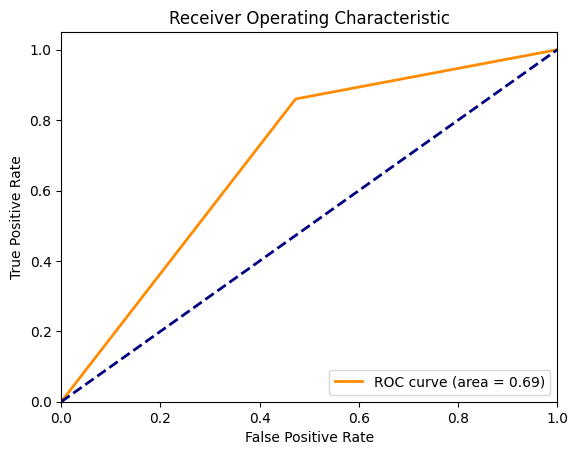

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[153 137]
 [ 61 375]]


<Axes: >

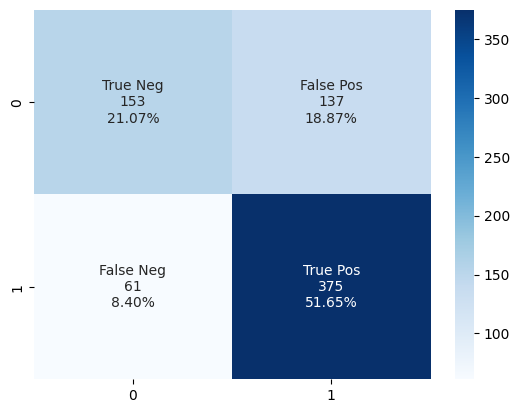

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

# XGBoost

In [ ]:
bin_log = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000)
bin_log.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
target_prediction = bin_log.predict(X_test)

Accuracy: 0.8071625344352618
Precision: 0.8203463203463204
Recall: 0.8692660550458715
F1-Score: 0.844097995545657
ROC-AUC: 0.7915295792470737


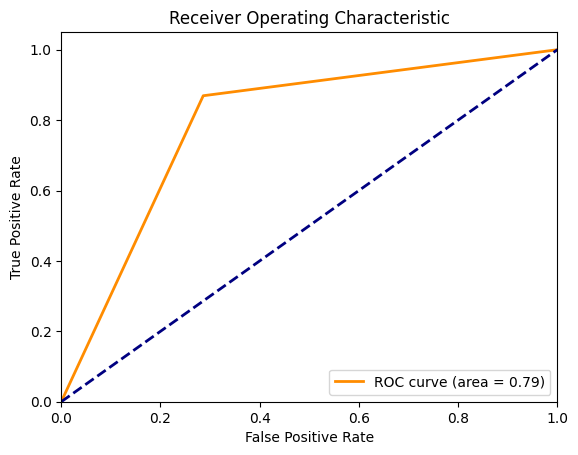

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, target_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, target_prediction)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, target_prediction)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, target_prediction)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, target_prediction)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, target_prediction)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[207  83]
 [ 57 379]]


<Axes: >

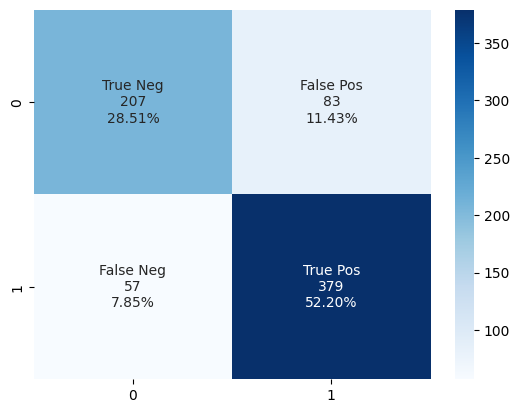

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

# Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Fit the classifier on the training data
gb_classifier.fit(X_train, Y_train)

# Make predictions on the test data
target_prediction = gb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, target_prediction)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8278236914600551


In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, target_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, target_prediction)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, target_prediction)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, target_prediction)
print("ROC-AUC:", roc_auc)

Accuracy: 0.8278236914600551
Precision: 0.8219461697722568
Recall: 0.9105504587155964
F1-Score: 0.8639825897714909
ROC-AUC: 0.8069993672888328


In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


# CatBoost

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=1000,  # Adjust the number of iterations as needed
                           depth=6,  # Adjust the depth of the trees as needed
                           learning_rate=0.1,  # Adjust the learning rate as needed
                           loss_function='Logloss',  # Use 'Logloss' for binary classification
                           random_seed=42)  # Set a random seed for reproducibility

model.fit(X_train, Y_train)

target_prediction = model.predict(X_test)

0:	learn: 0.6383759	total: 48.6ms	remaining: 48.6s
1:	learn: 0.5963871	total: 51.5ms	remaining: 25.7s
2:	learn: 0.5660444	total: 53.7ms	remaining: 17.8s
3:	learn: 0.5397745	total: 55.8ms	remaining: 13.9s
4:	learn: 0.5198178	total: 57.9ms	remaining: 11.5s
5:	learn: 0.4977910	total: 59.9ms	remaining: 9.92s
6:	learn: 0.4842692	total: 61.8ms	remaining: 8.76s
7:	learn: 0.4684801	total: 63.8ms	remaining: 7.91s
8:	learn: 0.4589082	total: 65.8ms	remaining: 7.24s
9:	learn: 0.4481388	total: 67.8ms	remaining: 6.72s
10:	learn: 0.4411763	total: 69.9ms	remaining: 6.29s
11:	learn: 0.4335080	total: 71.9ms	remaining: 5.92s
12:	learn: 0.4266732	total: 74ms	remaining: 5.62s
13:	learn: 0.4201275	total: 76.1ms	remaining: 5.36s
14:	learn: 0.4159885	total: 78ms	remaining: 5.12s
15:	learn: 0.4119816	total: 80ms	remaining: 4.92s
16:	learn: 0.4058372	total: 82.1ms	remaining: 4.75s
17:	learn: 0.4011602	total: 84.1ms	remaining: 4.59s
18:	learn: 0.3971178	total: 86.1ms	remaining: 4.44s
19:	learn: 0.3944589	total: 

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, target_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, target_prediction)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, target_prediction)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, target_prediction)
print("ROC-AUC:", roc_auc)

Accuracy: 0.8236914600550964
Precision: 0.826271186440678
Recall: 0.8944954128440367
F1-Score: 0.8590308370044053
ROC-AUC: 0.8058683960771909


# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=100,  # Adjust the number of estimators (trees) as needed
                  learning_rate=1.0)  # Adjust the learning rate as needed

model.fit(X_train, Y_train)

target_prediction = model.predict(X_test)


In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, target_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, target_prediction)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, target_prediction)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, target_prediction)
print("ROC-AUC:", roc_auc)

Accuracy: 0.8292011019283747
Precision: 0.8223140495867769
Recall: 0.9128440366972477
F1-Score: 0.8652173913043478
ROC-AUC: 0.8081461562796585
